In [34]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from itertools import combinations
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["families"].find({})))

(0.0, 40.0)

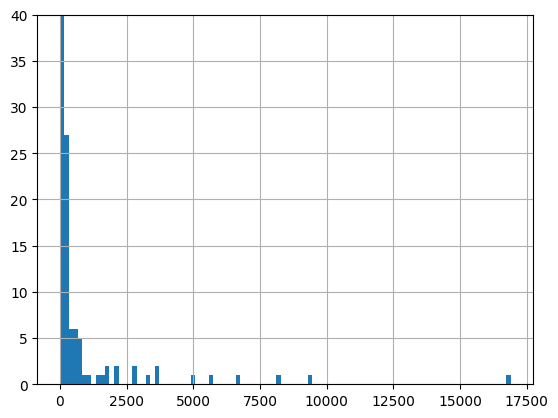

In [35]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

family_counts.hist(bins=100)
plt.ylim(0, 40)

In [36]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash
...,...,...,...,...,...,...,...,...
104365,6563a2f13624482ac9d32f90,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,{'ssdeep': '24576:OD46fWg3rOqkdvJ7jXLq7+aywR+r...,sdhash hash,{'tlsh': 'T1C64523683D62D4F0C4EF523C29FA7B2C76...,Machoc hash
104366,6563a2f13624482ac9d32f91,zxShell,e416ad91acbc386bf67dc551fb36b9d95a195d8b656cfe...,581536,{'ssdeep': '12288:1wHoMbN76R+m/ZZsJsjLa7pxIkmV...,sdhash hash,{'tlsh': 'T178C423AB070915FBE54ADC3C005752E41C...,Machoc hash
104367,6563a2f13624482ac9d32f92,zxShell,ef049339f1eb091cda335b51939f91e784e1ab1e006056...,1678576,{'ssdeep': '24576:nUtLEVCXBJFlUXYuJmQsYsECO0Gw...,sdhash hash,{'tlsh': 'T1807533E66396CC60DFAAC4B2AF8F4266DB...,Machoc hash
104368,6563a2f13624482ac9d32f93,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,{'ssdeep': '24576:hlIE5fsyVqdxskKfia9TQyaM9rrI...,sdhash hash,{'tlsh': 'T1067533C5AA1F6183EFCB443A57759E3AF7...,Machoc hash


In [37]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 104370 rows.
Filtered DataFrame has 104260 rows.
Families removed (only had 1 entry): ['Cryxos', 'CABless-40444', 'Amadey', 'Gopuram', 'GoSearch', 'WhiteBlackCrypt', 'OriginLogger', 'Android.Sharkbot', 'CaddyWiper', 'Coper', 'WagnerWiper', 'GwisinLocker', 'GoodwillRansomware', 'DeadBoltRansomware', 'CuratorRansomware', 'HaronRansomware', 'VMProtect', 'Cova', 'ViperSoftX', 'AzovRansomware', 'RhadamanthysLoader', 'Hydra', 'DarkWatchmanRAT', 'VBCrypt', 'NvRendererMiner', 'CerberRansomware', 'GodFather', 'Nukesped', 'RedCap', 'DTrack', 'Pymafka', 'EchelonStealer', 'DiscordRAT', 'Enigma', 'Escobar', 'AcidRain', 'EvilQuest', 'Zanubis', 'PoweRAT', 'Exmatter', 'ClipBanker', 'PlatinumGroup', 'FastViewer', 'Conficker', 'FBIOperationDuckHunt', 'Ousaban', 'AppleSeed', 'Flashback', 'Oski', 'XFilesStealer', 'Oscorp', 'CertiShell', 'Gh0stRAT', 'GigabudRAT', 'Industroyer', 'IssacWiper', 'IRATA', 'MeowRansomware', 'Babadeda', 'NeutrinoEK', 'Strab', 'MacOS.Coldroot', 'Stealc', 'Ma

([], [])

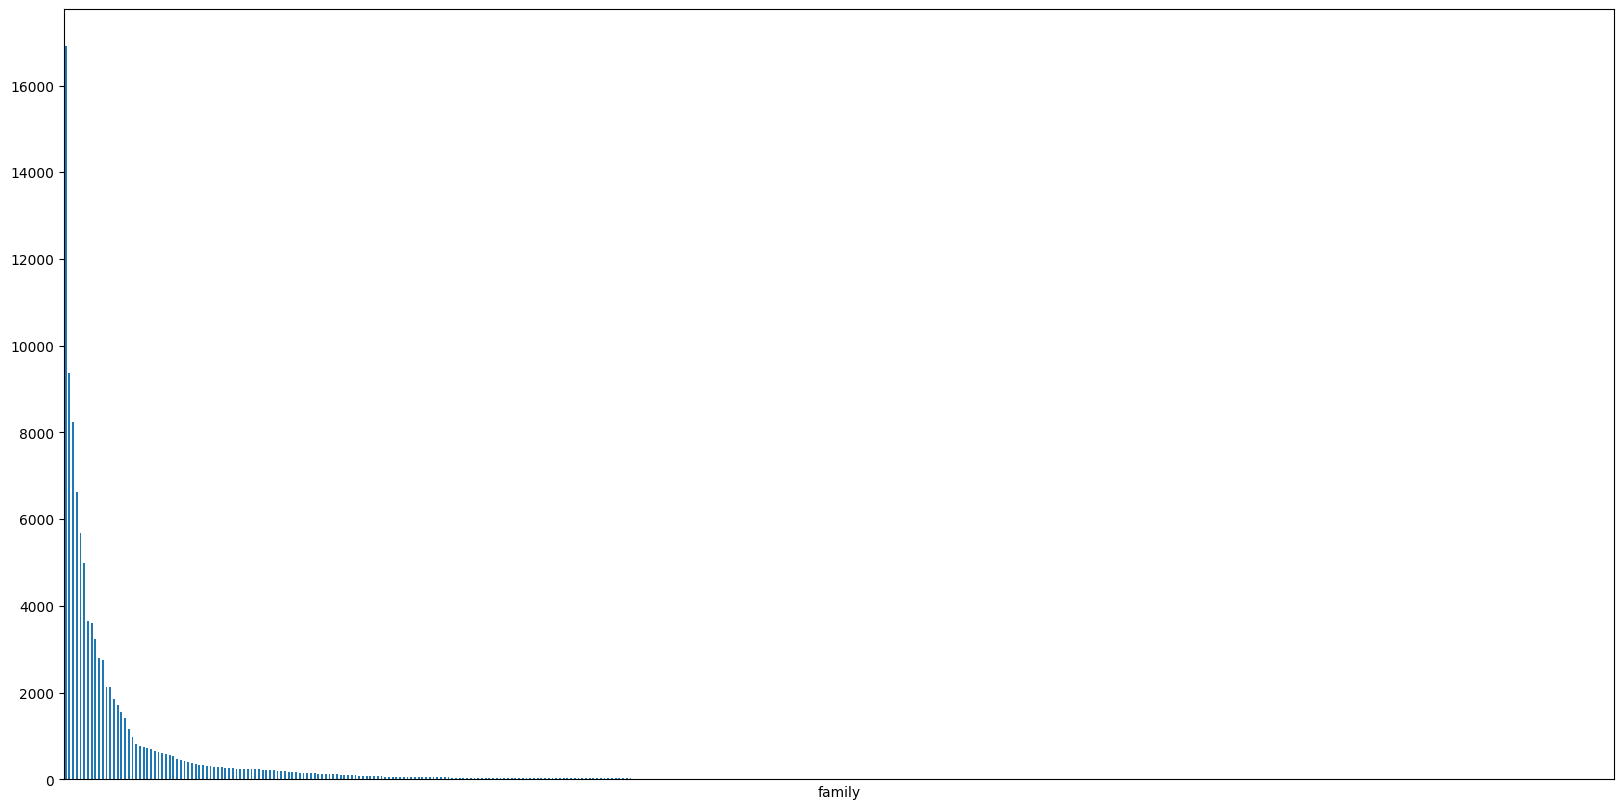

In [38]:
malware_filtered["family"].value_counts().plot(x="family", y="count", kind="bar", figsize=(20, 10))
plt.xticks([])

In [39]:
len(df["family"].unique())

527

In [40]:
malware_filtered["scicore"] = False
size = malware_filtered.shape[0] / 20
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,1634,SAMtools,97210bb6d9a79e4b83ef2e5a396cce7b74a14667195fe0...,430872,{'ssdeep': '6144:IYuiUG/z/kwS+kcJGKYBzP/F5b1du...,sdhash hash,{'tlsh': 'T151945B5BE69218F9C1E78435176F7022B8...,Machoc hash,True
1986,550,CellRanger,c464f7f2f1bc296c17bc1ff948142db41751fcfb76e224...,11967816,{'ssdeep': '98304:zyQmN6cWBlnBoZhd/emDrGUAV/Vp...,sdhash hash,{'tlsh': 'T16AC69D06A8F04F30CCEF9B36887D515C27...,Machoc hash,True
1987,906,IOR,d8c6410d81960425d3a6d3c0cf74a1d07dade163222136...,142712,{'ssdeep': '1536:4yYeMddukCbVV9pn482NjtmzCiCHH...,sdhash hash,{'tlsh': 'T17AD339477ED108F9C5C8C430AFCB0272A6...,Machoc hash,True
1988,1839,MACS2,a2cca47c6b2a64c56fc1d79c8432b84bf9a05e220d41a8...,196,{'ssdeep': '6:B5SKLN1WcccehtKQTNoXFIl8+DgVQ4wZ...,sdhash hash,{'tlsh': 'T1BCD022720670BC823AE01B9C142830A0A0...,Machoc hash,True


In [41]:
a = malware_concat
# noinspection PyPackageRequirements
a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,T1D9937B107682C275D47A29344C69CB731BBE7E529AF4...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,T14217331276D2C037C1A711719A37EB29AAF2B0305734...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,T192D6336519E01E8CF2D177765AB1A2D44F79FF168B43...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,T16827339FB8735437E78CE4F089FA77F202ED9DB5B854...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,1634,SAMtools,97210bb6d9a79e4b83ef2e5a396cce7b74a14667195fe0...,430872,{'ssdeep': '6144:IYuiUG/z/kwS+kcJGKYBzP/F5b1du...,sdhash hash,T151945B5BE69218F9C1E78435176F7022B871B4614730...,Machoc hash,True
1986,550,CellRanger,c464f7f2f1bc296c17bc1ff948142db41751fcfb76e224...,11967816,{'ssdeep': '98304:zyQmN6cWBlnBoZhd/emDrGUAV/Vp...,sdhash hash,T16AC69D06A8F04F30CCEF9B36887D515C27353A58C60D...,Machoc hash,True
1987,906,IOR,d8c6410d81960425d3a6d3c0cf74a1d07dade163222136...,142712,{'ssdeep': '1536:4yYeMddukCbVV9pn482NjtmzCiCHH...,sdhash hash,T17AD339477ED108F9C5C8C430AFCB0272A6BAFC245235...,Machoc hash,True
1988,1839,MACS2,a2cca47c6b2a64c56fc1d79c8432b84bf9a05e220d41a8...,196,{'ssdeep': '6:B5SKLN1WcccehtKQTNoXFIl8+DgVQ4wZ...,sdhash hash,T1BCD022720670BC823AE01B9C142830A0A0AD62619730...,Machoc hash,True


In [42]:

filtered_df = a[a['tlsh'] != 'TNULL']



In [43]:
b = a[['family', 'scicore', 'tlsh']]
len(b[b['tlsh'] == 'TNULL'])

19

In [44]:
import pandas as pd
from itertools import combinations
import tlsh

def tlsh_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = tlsh.diff(row1.tlsh, row2.tlsh)
                results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.tlsh, row2.tlsh, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results

    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'TLSH 1', 'TLSH 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_tlsh = tlsh_comb_chunked(filtered_df, chunk_size=100)
results_tlsh

,Family 1,Family 2,Scicore 1,Scicore 2,TLSH 1,TLSH 2,Diff Score
0,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T1D9937B107682C275D47A29344C69CB731BBE7E529AF4...,175
1,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T14217331276D2C037C1A711719A37EB29AAF2B0305734...,944
2,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T192D6336519E01E8CF2D177765AB1A2D44F79FF168B43...,962
3,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T16827339FB8735437E78CE4F089FA77F202ED9DB5B854...,977
4,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T10C37332826D44975CFFA6172FA5B10AC3200F4F5ED0A...,1038
...,...,...,...,...,...,...,...
5257360,CellRanger,MACS2,True,True,T16AC69D06A8F04F30CCEF9B36887D515C27353A58C60D...,T1BCD022720670BC823AE01B9C142830A0A0AD62619730...,1455
5257361,CellRanger,future,True,True,T16AC69D06A8F04F30CCEF9B36887D515C27353A58C60D...,T1E7E0AB118870DF2167E202CB623020682117BF636B14...,1327
5257362,IOR,MACS2,True,True,T17AD339477ED108F9C5C8C430AFCB0272A6BAFC245235...,T1BCD022720670BC823AE01B9C142830A0A0AD62619730...,863
5257363,IOR,future,True,True,T17AD339477ED108F9C5C8C430AFCB0272A6BAFC245235...,T1E7E0AB118870DF2167E202CB623020682117BF636B14...,875


In [45]:
p = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]


In [46]:
(p["Family 1"] == p["Family 2"]).value_counts()

True     87100
False     3153
Name: count, dtype: int64

In [47]:
def tlsh_thresh(s):
    s = s.loc[s.groupby("TLSH 1")["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb_chunked(filtered_df, chunk_size=100))
p

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.000000,0.000000
1,1.0,0.254288,0.159817
2,2.0,0.862692,0.176471
3,3.0,0.892061,0.182648
4,4.0,0.909422,0.189815
...,...,...,...
295,295.0,0.997953,1.000000
296,296.0,0.997977,1.000000
297,297.0,0.997989,1.000000
298,298.0,0.998036,1.000000


In [48]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 9


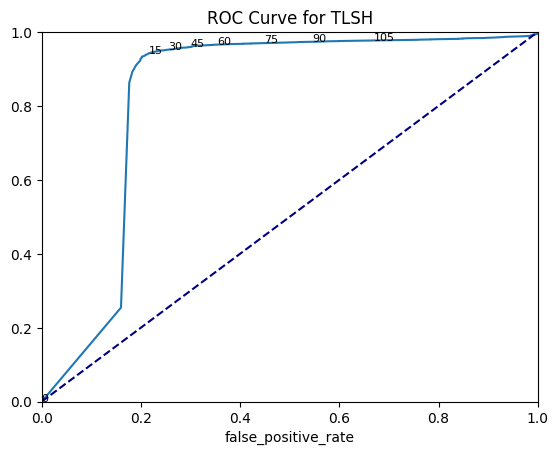

In [49]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for TLSH", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0] - 1, 15):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i > 100:
        break
plt.show()

In [50]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 9


In [51]:
def ssdeep_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk_ssdeep(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = ssdeep.compare(row1.ssdeep, row2.ssdeep)
                if diff_score == 0:
                    results.append((row1.family, "No Match", row1.scicore, row2.scicore, row1.ssdeep, row2.ssdeep, diff_score))
                else:
                    results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.ssdeep, row2.ssdeep, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results
    df['ssdeep'] = df['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)
    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk_ssdeep(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'ssdeep 1', 'ssdeep 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_ssdeep = ssdeep_comb_chunked(malware_concat, chunk_size=100)
results_ssdeep

,Family 1,Family 2,Scicore 1,Scicore 2,ssdeep 1,ssdeep 2,Diff Score
0,9002Rat,No Match,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6ffTiwi:isQQj...,0
1,9002Rat,No Match,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:1ZZNprQxrpbXZRCb0g/6cGx3PjWrIMhGbEV18I+...,0
2,9002Rat,No Match,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:z0ZCif89tnKfsp09SskycXZBBLWNcQxvl6lk:aP...,0
3,9002Rat,No Match,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO/EEw6iwlmXhg...,0
4,9002Rat,No Match,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:buyeOSYAWkyoxbMn8lGjkhu2coAr2ta/D9L3C+s...,0
...,...,...,...,...,...,...,...
5258120,CellRanger,No Match,True,True,98304:zyQmN6cWBlnBoZhd/emDrGUAV/VpOv4zzXGV1cM4...,6:B5SKLN1WcccehtKQTNoXFIl8+DgVQ4wZK:fp1W/DK06Q4w8,0
5258121,CellRanger,No Match,True,True,98304:zyQmN6cWBlnBoZhd/emDrGUAV/VpOv4zzXGV1cM4...,12:fTODKuqXCnyCXCmzoi9VrCF2aGNM1m2SfVcXCcWa:fT...,0
5258122,IOR,No Match,True,True,1536:4yYeMddukCbVV9pn482NjtmzCiCHHD/gkldlgHNfl...,6:B5SKLN1WcccehtKQTNoXFIl8+DgVQ4wZK:fp1W/DK06Q4w8,0
5258123,IOR,No Match,True,True,1536:4yYeMddukCbVV9pn482NjtmzCiCHHD/gkldlgHNfl...,12:fTODKuqXCnyCXCmzoi9VrCF2aGNM1m2SfVcXCcWa:fT...,0


In [52]:
results_ssdeep[results_ssdeep["Family 1"] == "Predator the Thief"]["Diff Score"].idxmax()

4202845

In [53]:
results_ssdeep.iloc[4202845]

Family 1                                     Predator the Thief
Family 2                                     Predator the Thief
Scicore 1                                                 False
Scicore 2                                                 False
ssdeep 1      12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...
ssdeep 2      12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...
Diff Score                                                  100
Name: 4202845, dtype: object

In [54]:
s = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
s[s["Family 1"] == "Predator the Thief"]

,Family 1,Family 2,Scicore 1,Scicore 2,ssdeep 1,ssdeep 2,Diff Score
4202845,Predator the Thief,Predator the Thief,False,False,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,100
4206275,Predator the Thief,No Match,False,False,12288:kIBLMT7EgHRYGtUrdgugEnoSE5iNAdl++Vs4PTLJ...,6144:bUyD1Vzw/mvsV+IltcrqF5Fpg8VgcRG6l+wjkvARw...,0
4206122,Predator the Thief,No Match,False,False,12288:mb8BkqPC0cC5z4MkD9PIOcaU0zLfoaeRcVAE/TW6...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,0
4204179,Predator the Thief,No Match,False,False,12288:qfw+Jdq4FzNUpUTkMN5e6TeinhpLu7RL3xpto7LJ...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,0
4204874,Predator the Thief,Predator the Thief,False,False,12288:x/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,99
4205355,Predator the Thief,No Match,False,False,1536:YcQwOXg9TQ+1UKzJt1BKLi8Cdv7/svKs/KEhtoYIv...,6144:7Nvje8/xMgsZ+Axb0b+ih+F7xXA+uVJ15tjQVyVfG...,0
4203224,Predator the Thief,Predator the Thief,False,False,49152:AEBXpFvxG6mtx5QxLguFsSg0iqNsuZT3tXzlSLjE...,49152:lTswQA0pQlZbkpKV8gWba5cvtiqNsuZT3tXzlSLj...,58
4205904,Predator the Thief,No Match,False,False,49152:RxwQZClFsW/Osnm1lCiIfWV4TzvVOHZqiqNsuZT3...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,0
4206015,Predator the Thief,No Match,False,False,49152:YPpr1FtIMFSZeSn+0hNuQFRtnDMAVTVP6KPVy+YK...,12288:+/fQmrqZh1apumMATyKn6k7anQQ/uPqJFJ6ACjLY...,0
4205847,Predator the Thief,No Match,False,False,49152:j552Lu7NOJKsifHEm+KvC+Y0G8od1JBIbzWDmOgk...,49152:RxwQZClFsW/Osnm1lCiIfWV4TzvVOHZqiqNsuZT3...,0


In [55]:
size = s.shape[0]
s = s[s["Scicore 2"] == False]
(s["Family 1"] == s["Family 2"]).value_counts()

True     44078
False    42278
Name: count, dtype: int64

In [56]:
def ssdeep_thresh(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = ssdeep_thresh(ssdeep_comb_chunked(malware_concat, chunk_size=100))
p

,threshold,true_positive_rate,false_positive_rate
0,0.0,1.000000,1.0
1,1.0,0.961814,1.0
2,2.0,0.961814,1.0
3,3.0,0.961814,1.0
4,4.0,0.961814,1.0
...,...,...,...
105,105.0,0.000000,0.0
106,106.0,0.000000,0.0
107,107.0,0.000000,0.0
108,108.0,0.000000,0.0


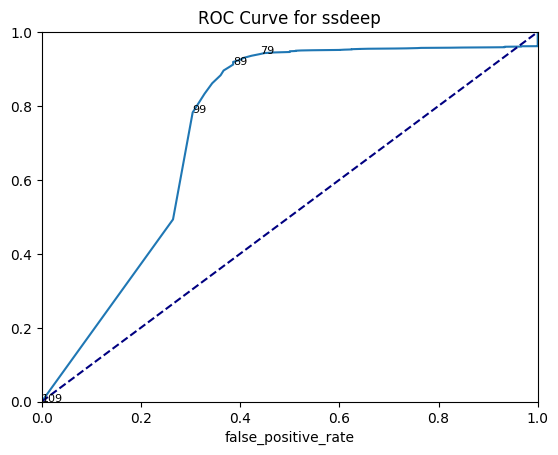

In [57]:
# Plot the ROC curve in range 0.1 to 1.0
ax = p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)
for i in range(p.shape[0]- 1,0, -10):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i < 80:
        break
# add a dotet line with y = x for comparison
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [58]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 86


In [59]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]

tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < 400]
tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]

ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] > 0]

(ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)

0.9967701133848308

In [60]:
len(ssdeep_comp_diff) / len(ssdeep_comp)

0.5015576676900071

In [61]:
intersect = set(tlsh_comp_diff["Family 1"]) & set(ssdeep_comp_diff["Family 1"])
union = set(tlsh_comp_diff["Family 1"]) | set(ssdeep_comp_diff["Family 1"])
len(union - intersect) / len(union)


0.4601941747572815

In [64]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
tls = []
ssd = []
for i in range (0,300,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]
    winrate = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    total = len(tlsh_comp_diff) / len(tlsh_comp)
    tls.append((winrate, 1-winrate, total,i))
for j in range (0,110,1):
    ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Scicore 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_comp)
    ssd.append((winrate, 1-winrate, total,j))

<Figure size 640x480 with 0 Axes>

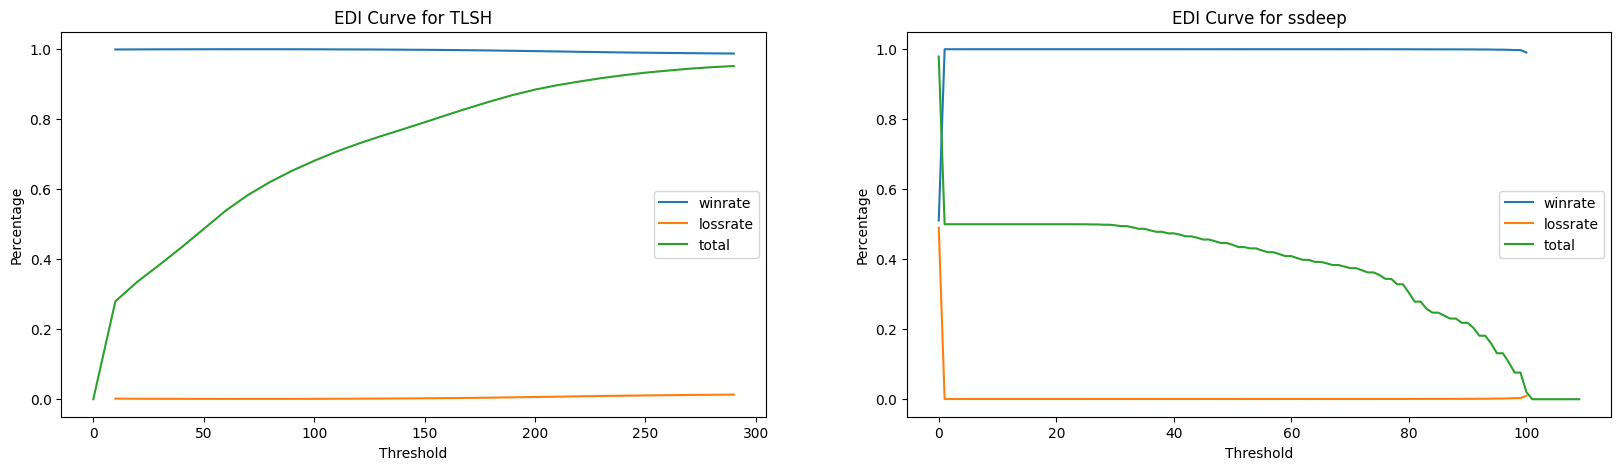

In [66]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
#ti = titi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for TLSH")
#si = sisi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for ssdeep")

plt.clf()
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="winrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="lossrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="winrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="lossrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
plt.show()